# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [13]:
# Your code here:
fifa['ValueNumeric']=fifa['Value'].str.extract(r'(\d+.?\d+)').astype('float')
fifa['ValueNumeric2'] = np.where(fifa['Value'].str.findall(r'(\d+.?\d+K)'),
                                 fifa['ValueNumeric']/1000, fifa['ValueNumeric'])
fifa['ValueNumeric2']

0        110.50
1         77.00
2        118.50
3         72.00
4        102.00
          ...  
18202      0.06
18203      0.06
18204      0.06
18205      0.06
18206      0.06
Name: ValueNumeric2, Length: 18207, dtype: float64

In [14]:
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric      float64
ValueNumeric2     float64
dtype: object

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [18]:
# Your code here:
fifa[['ValueNumeric2','Position','Preferred Foot']]


,ValueNumeric2,Position,Preferred Foot
0,110.50,RF,Left
1,77.00,ST,Right
2,118.50,LW,Right
3,72.00,GK,Right
4,102.00,RCM,Right
...,...,...,...
18202,0.06,CM,Right
18203,0.06,ST,Right
18204,0.06,ST,Right
18205,0.06,RW,Right


In [19]:
fifa.rename(columns={'Preferred Foot':'PreferredFoot'},inplace=True)
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'PreferredFoot', 'Position', 'Weak Foot', 'Acceleration', 'SprintSpeed',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'ValueNumeric', 'ValueNumeric2'],
      dtype='object')

<AxesSubplot:title={'center':'ValueNumeric2'}, xlabel='Preferred Foot'>

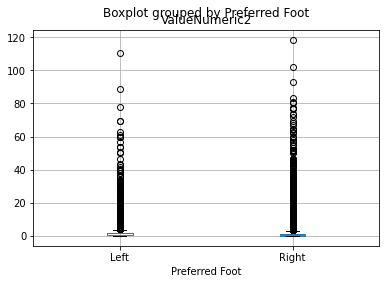

In [15]:
fifa.boxplot('ValueNumeric2', by='Preferred Foot')

In [29]:
model = ols('ValueNumeric2~C(Position)*C(PreferredFoot)', data=fifa).fit()
table_1 = sm.stats.anova_lm(model, typ=1)
table_2 = sm.stats.anova_lm(model, typ=2)

In [30]:
table_1

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),26.0,16542.387416,636.245670,19.940409,1.959293e-91
C(PreferredFoot),1.0,243.756270,243.756270,7.639501,5.716673e-03
C(Position):C(PreferredFoot),26.0,5795.963486,222.921673,6.986530,3.943684e-25
Residual,16580.0,529023.919477,31.907353,NaN,NaN


In [31]:
table_2

,sum_sq,df,F,PR(>F)
C(Position),16602.167970,26.0,20.012469,8.237024e-92
C(PreferredFoot),243.756270,1.0,7.639501,5.716673e-03
C(Position):C(PreferredFoot),5795.963486,26.0,6.986530,3.943684e-25
Residual,529023.919477,16580.0,NaN,NaN


What is your conclusion from this ANOVA?

**The p value for both positions is well below 0.05, hence there seems to be a distinction between both, the foot preference and the position of the player and the amount of money they make.**

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [23]:
# Your code here:
model2 = ols('ValueNumeric2~Nationality', data=fifa).fit()
table_3 = sm.stats.anova_lm(model2, typ=1)
table_3


,df,sum_sq,mean_sq,F,PR(>F)
Nationality,163.0,32346.460361,198.444542,6.291491,2.699973e-120
Residual,16519.0,521037.937885,31.541736,NaN,NaN


What is your conclusion from this ANOVA?

**Similarly as abobve, the Fischer value is high so Nationality does play a role in how much you make.Makes sense, life's a bitch**

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [24]:
# Your code here:
fifa.isnull()

,Name,Age,Nationality,Overall,Potential,Club,Value,PreferredFoot,Position,Weak Foot,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric,ValueNumeric2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
fifaN = fifa.dropna()
len(fifaN)

16634

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [26]:
# Your code here:
yfifa = fifaN['ValueNumeric2']

#define predictor variables
xfifa = fifaN[['Stamina','SprintSpeed']]

#add constant to predictor variables
xfifa = sm.add_constant(xfifa)

#fit linear regression model
model = sm.OLS(yfifa, xfifa).fit()

#view model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ValueNumeric2   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     400.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.07e-170
Time:                        16:41:15   Log-Likelihood:                -52332.
No. Observations:               16634   AIC:                         1.047e+05
Df Residuals:                   16631   BIC:                         1.047e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1676      0.207    -15.278      0.000      -3.574      -2.761
Stamina         0.0603      0.003     17.291      0.000       0.053       0.067
SprintSpeed     0.0258      0.004      6.820      0.000       0.018       0.033
==============================================================================
Omnibus:                    21313.755   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4225976.694
Skew:                           7.123   Prob(JB):                         0.00
Kurtosis:                      79.775   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.


**Our model is not particularly good given the low R squared of .046**

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [27]:
# Your code here:
yfifa = fifaN['ValueNumeric2']

#define predictor variables
xfifa2 = fifaN['Potential']

#add constant to predictor variables
xfifa2 = sm.add_constant(xfifa2)

#fit linear regression model
model2 = sm.OLS(yfifa, xfifa2).fit()

#view model summary
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ValueNumeric2   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     8095.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:34   Log-Likelihood:                -49425.
No. Observations:               16634   AIC:                         9.885e+04
Df Residuals:                   16632   BIC:                         9.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.7757      0.425    -84.261      0.000     -36.608     -34.943
Potential      0.5361      0.006     89.973      0.000       0.524       0.548
==============================================================================
Omnibus:                    21125.783   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5343897.657
Skew:                           6.885   Prob(JB):                         0.00
Kurtosis:                      89.722   Cond. No.                         826.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

**This model is a little better than the previous one but still not so good**


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

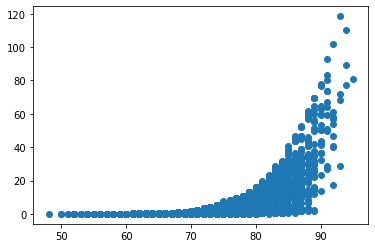

In [28]:
# Your code here:
plt.scatter(fifaN['Potential'],fifaN['ValueNumeric2'])